In [21]:
# 📊 Bitcoin Market Sentiment vs Trader Performance

import pandas as pd

trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, errors='coerce').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification', 'value']],  # Keep only needed columns
    on='date',
    how='left'
)

merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].agg(['sum', 'mean', 'count']).reset_index()

with pd.ExcelWriter("merged_trader_sentiment_analysis.xlsx") as writer:
    merged_df.to_excel(writer, sheet_name='Merged_Data', index=False)
    pnl_by_sentiment.to_excel(writer, sheet_name='PnL_by_Sentiment', index=False)

print("✅ Excel file exported: merged_trader_sentiment_analysis.xlsx")

✅ Excel file exported: merged_trader_sentiment_analysis.xlsx


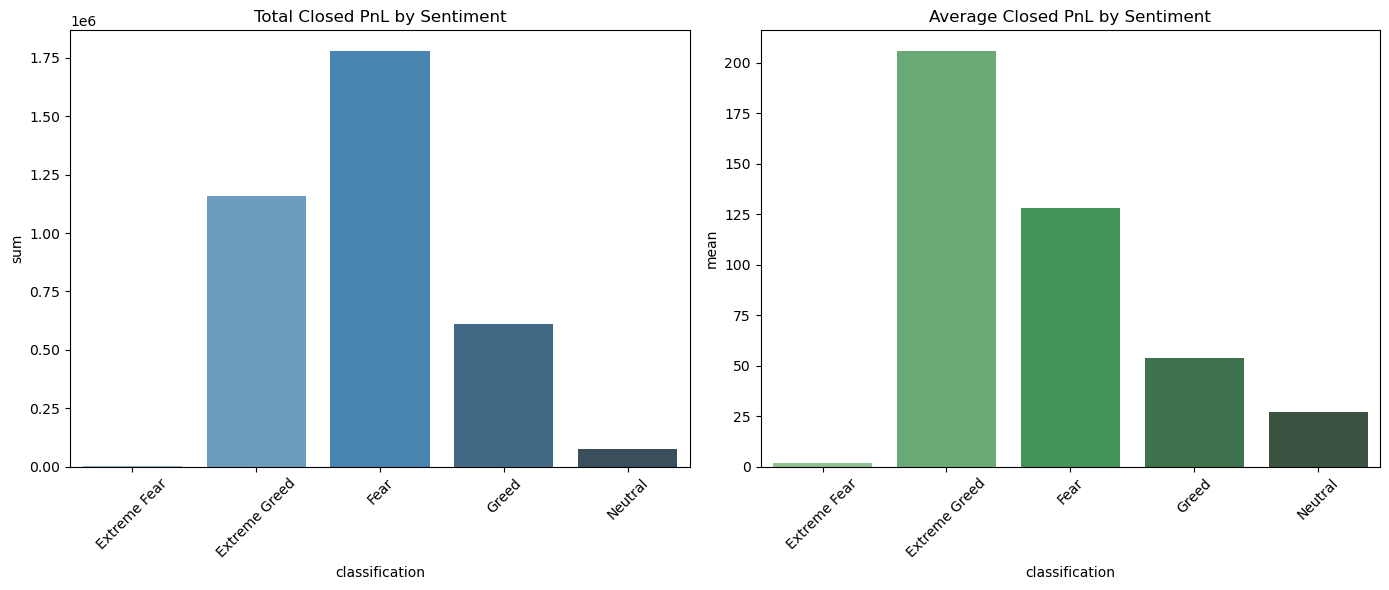

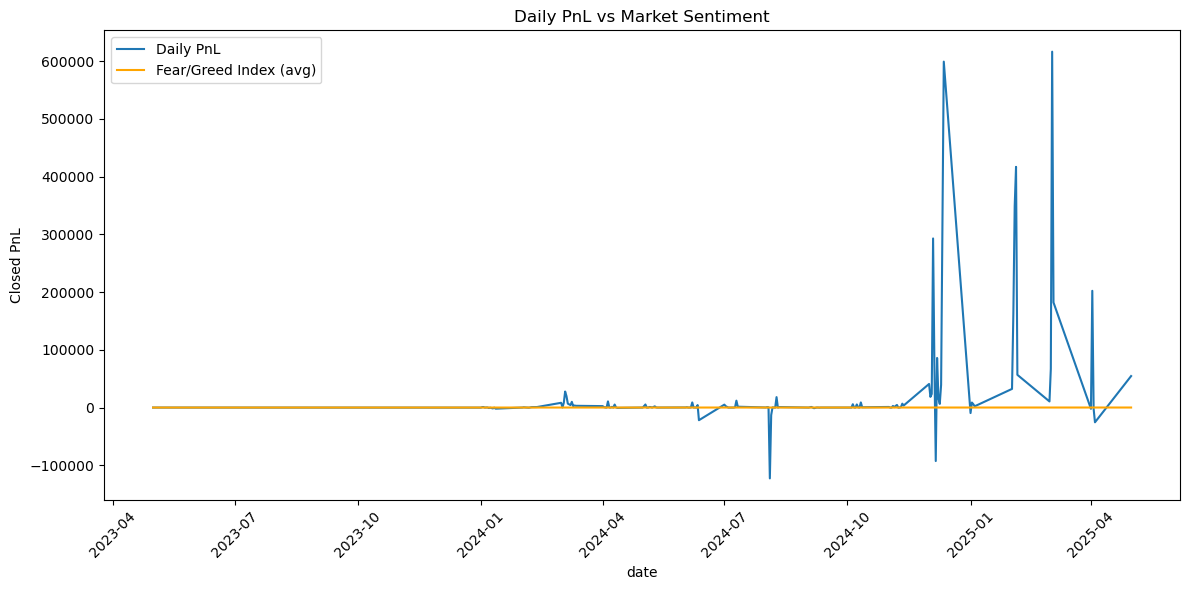

In [28]:
import pandas as pd

# Load the merged Excel file
df = pd.read_excel("merged_trader_sentiment_analysis.xlsx", sheet_name="Merged_Data")

import matplotlib.pyplot as plt
import seaborn as sns

# Convert PnL column to numeric
df['Closed PnL'] = pd.to_numeric(df['Closed PnL'], errors='coerce')

# Drop rows with missing sentiment classification
df = df.dropna(subset=['classification'])

# Group by sentiment
summary = df.groupby('classification')['Closed PnL'].agg(['sum', 'mean', 'count']).reset_index()

plt.figure(figsize=(14, 6))

# Total PnL by Sentiment
plt.subplot(1, 2, 1)
#sns.barplot(data=summary, x='classification', y='sum', palette='Blues_d')
sns.barplot(data=summary, x='classification', y='sum', hue='classification', palette='Blues_d', legend=False)
plt.title('Total Closed PnL by Sentiment')
plt.xticks(rotation=45)

# Average PnL by Sentiment
plt.subplot(1, 2, 2)
#sns.barplot(data=summary, x='classification', y='mean', palette='Greens_d')
sns.barplot(data=summary, x='classification', y='mean', hue='classification', palette='Greens_d', legend=False)
plt.title('Average Closed PnL by Sentiment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("sentiment_pnl_analysis.png", dpi=300)
plt.show()

daily_df = df.groupby('date').agg({'Closed PnL': 'sum', 'value': 'mean'}).dropna().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_df, x='date', y='Closed PnL', label='Daily PnL')
sns.lineplot(data=daily_df, x='date', y='value', label='Fear/Greed Index (avg)', color='orange')
plt.title("Daily PnL vs Market Sentiment")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("daily_pnl_vs_sentiment.png", dpi=300)
plt.show()


